### Loading the dataset - 21BAI1007

In [1]:
import numpy as np

In [2]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print("Shape of training dataset:",train_images.shape)
print("Shape of training labels:",train_labels.shape)

Shape of training dataset: (60000, 28, 28)
Shape of training labels: (60000,)


We have 60000 images, each of size 28*28 pixels. Each label is an integer between 0 and 9

In [4]:
print("Length of training dataset: ",len(train_images))
print("Length of testing dataset: ",len(test_images))

Length of training dataset:  60000
Length of testing dataset:  10000


### Normalizing the dataset - 21BAI1007

In [5]:
import matplotlib.pyplot as plt

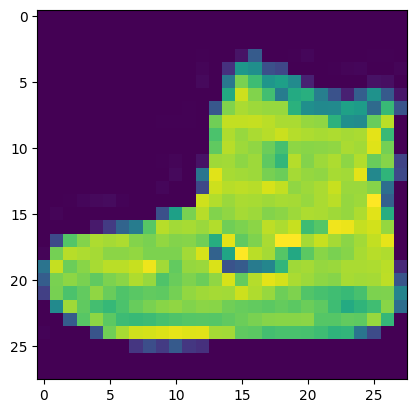

In [6]:
## PLotting the image of the first object in the dataset
plt.figure()
plt.imshow(train_images[0])

In [7]:
## To normalize the dataset, we divide each value by 255 so that the data is minimized to a value between 0 and 1
train_images = train_images/255.0
test_images = test_images/255.0

### Build the model using K Fold auto tuning- 21BAI1007

In [8]:
features = np.concatenate((train_images, test_images))
labels = np.concatenate((train_labels, test_labels))

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [10]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
cvscores = []

In [12]:
for train, test in kfold.split(features, labels):
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
  model.fit(features[train], labels[train], validation_data=(features[test], labels[test]), epochs=10)
  scores = model.evaluate(features[test], labels[test], verbose=1)
  print("%s: %d" % (model.metrics_names[1], scores[1]))
  cvscores.append(scores[1] * 100)


Epoch 1/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.5051 - accuracy: 0.8213 - val_loss: 0.4371 - val_accuracy: 0.8414
Epoch 2/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.3822 - accuracy: 0.8621 - val_loss: 0.3690 - val_accuracy: 0.8704
Epoch 3/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.3413 - accuracy: 0.8752 - val_loss: 0.3557 - val_accuracy: 0.8739
Epoch 4/10
1750/1750 [==============================] - 6s 3ms/step - loss: 0.3162 - accuracy: 0.8833 - val_loss: 0.3426 - val_accuracy: 0.8788
Epoch 5/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.3008 - accuracy: 0.8875 - val_loss: 0.3243 - val_accuracy: 0.8862
Epoch 6/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2842 - accuracy: 0.8934 - val_loss: 0.3135 - val_accuracy: 0.8920
Epoch 7/10
1750/1750 [==============================] - 6s 4ms/step - loss: 0.2715 - accuracy: 0.8985 - val_loss: 0.3690 - val_accuracy:

### Creating model using grid search - 21BAI1007

In [ ]:
# pip install scikeras

# from keras.layers import Wrapper
# from scikeras.wrappers import KerasClassifier
# from sklearn.model_selection import GridSearchCV

# def create_model(optimizer="rmsprop", init = "glorot_uniform"):
#   model = Sequential()
#   model.add(Flatten(input_shape=(28,28)))
#   model.add(Dense(128, activation='relu'))
#   model.add(Dense(10, activation='softmax'))
#   model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
#   return model

# model2 = KerasClassifier(model=create_model, verbose=0)

# optimizers = ["rmsprop", "adam"]
# epochs = [50, 100]
# batches = [5, 10, 20]
# param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches)

# grid = GridSearchCV(estimator=model2, param_grid=param_grid)
# grid_result = grid.fit(features, labels)

# ** Grid search is taking a lot of time to run, hence not including the output **

### Predicting the classes of the test dataset - 21BAI1007

In [13]:
pred = model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [14]:
# The predictions are a probability distribution of each class. To convert it into the required class
# Predicting the class of the first element in the testing dataset
np.argmax(pred[0])

9

In [15]:
# Checking if the prediction is correct
test_labels[0]

9

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Predciting a random image from the test dataset - 21BAI1007

In [17]:
image = test_images[1] ## An image of a pullover
print(image.shape)

(28, 28)


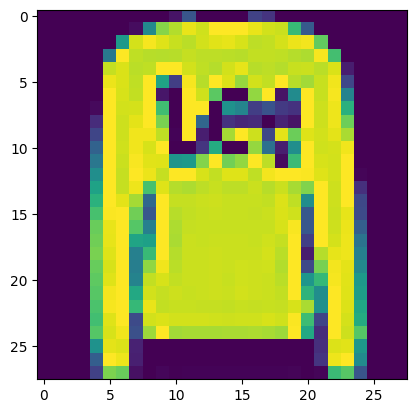

In [18]:
plt.imshow(test_images[1])

In [19]:
# To process the image in the model, we have to reshape it no include an extra dimension
image = (np.expand_dims(image, 0))
print(image.shape)

(1, 28, 28)


In [20]:
# Function to map the class number to the class name
def get_item_name(item_number, class_names):
    try:
        item_name = class_names[item_number]
        return item_name
    except IndexError:
        return "Item not found"

In [21]:
final_prediction = model.predict(image)
ans = np.argmax(final_prediction)
item_name = get_item_name(ans, class_names)
item_name

1/1 [==============================] - 0s 69ms/step


'Pullover'

Hence we correctly predicted the class of the image